The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [13]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import math
%matplotlib inline
import os

In [14]:
survey_df = pd.read_csv('survey.csv')


In [10]:
print (survey_df.head(10))

   ID  Gender  Age   Class              Major Grad Intention  GPA  Employment  \
0   1  Female   20  Junior              Other            Yes  2.9   Full-Time   
1   2    Male   23  Senior         Management            Yes  3.6   Part-Time   
2   3    Male   21  Junior              Other            Yes  2.5   Part-Time   
3   4    Male   21  Junior                CIS            Yes  2.5   Full-Time   
4   5    Male   23  Senior              Other      Undecided  2.8  Unemployed   
5   6  Female   22  Senior  Economics/Finance      Undecided  2.3  Unemployed   
6   7  Female   21  Junior              Other      Undecided  3.0   Part-Time   
7   8  Female   22  Senior              Other      Undecided  3.1   Full-Time   
8   9  Female   20  Junior         Management            Yes  3.6  Unemployed   
9  10  Female   21  Senior  Economics/Finance      Undecided  3.3   Part-Time   

   Salary  Social Networking  Satisfaction  Spending Computer  Text Messages  
0    50.0                  1 

In [21]:
survey_df.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [22]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [23]:
survey_df.dtypes

ID                     int64
Gender                object
Age                    int64
Class                 object
Major                 object
Grad Intention        object
GPA                  float64
Employment            object
Salary               float64
Social Networking      int64
Satisfaction           int64
Spending               int64
Computer              object
Text Messages          int64
dtype: object

2.1.1 Gender and Major

In [24]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Major'], 
                               margins = False)
print(survey_df_crosstab)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


2.1.2. Gender and Grad Intention

In [25]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Grad Intention'], 
                               margins = False)
print(survey_df_crosstab)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


2.1.3. Gender and Employment

In [26]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Employment'], 
                               margins = False)
print(survey_df_crosstab)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


2.1.4. Gender and Computer

In [27]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Computer'], 
                               margins = False)
print(survey_df_crosstab)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [28]:
survey_df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [3]:
print('Probability that a randomly selected CMSU student will be male:',((29/62)*100),'%')

Probability that a randomly selected CMSU student will be male: 46.774193548387096 %


In [5]:
print('Probability that a randomly selected CMSU student will be male:',((29/62)*100),'%')
print('Probability that a randomly selected CMSU student will be female:',((33/62)*100),'%')

Probability that a randomly selected CMSU student will be male: 46.774193548387096 %
Probability that a randomly selected CMSU student will be female: 53.2258064516129 %


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.


2.3.1. Find the conditional probability of different majors among the male students in CMSU.
2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [31]:
pd.crosstab(survey_df['Gender'],survey_df['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [32]:
print('Different Majors among the MALE students in CMSU :')
print('Probability of Accounting:',((4/29)*100),'%')
print('Probability of CIS:',((1/29)*100),'%')
print('Probability of Economics/Finance:',((4/29)*100),'%')
print('Probability of International Business:',((2/29)*100),'%')
print('Probability of Management:',((6/29)*100),'%')
print('Probability of Other:',((4/29)*100),'%')
print('Probability of Retailing/Marketing:',((5/29)*100),'%')
print('Probability of Undecided:',((3/29)*100),'%')
print()
print('Different Majors among the FEMALE students in CMSU :')
print('Probability of Accounting:',((3/33)*100),'%')
print('Probability of CIS:',((3/33)*100),'%')
print('Probability of Economics/Finance:',((7/33)*100),'%')
print('Probability of International Business:',((4/33)*100),'%')
print('Probability of Management:',((4/33)*100),'%')
print('Probability of Other:',((3/33)*100),'%')
print('Probability of Retailing/Marketing:',((9/33)*100),'%')
print('Probability of Undecided:',((0/33)*100),'%')

Different Majors among the MALE students in CMSU :
Probability of Accounting: 13.793103448275861 %
Probability of CIS: 3.4482758620689653 %
Probability of Economics/Finance: 13.793103448275861 %
Probability of International Business: 6.896551724137931 %
Probability of Management: 20.689655172413794 %
Probability of Other: 13.793103448275861 %
Probability of Retailing/Marketing: 17.24137931034483 %
Probability of Undecided: 10.344827586206897 %

Different Majors among the FEMALE students in CMSU :
Probability of Accounting: 9.090909090909092 %
Probability of CIS: 9.090909090909092 %
Probability of Economics/Finance: 21.21212121212121 %
Probability of International Business: 12.121212121212121 %
Probability of Management: 12.121212121212121 %
Probability of Other: 9.090909090909092 %
Probability of Retailing/Marketing: 27.27272727272727 %
Probability of Undecided: 0.0 %


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 


In [33]:
survey_df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [35]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Grad Intention'], 
                               margins = False)
print(survey_df_crosstab)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [36]:
print("P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male) = ",(((17/29) * (29/62))*100),'%')

P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male) =  27.419354838709676 %


2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [37]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Computer'], 
                               margins = False)
print(survey_df_crosstab)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


In [38]:
print("P(not have a laptop ∩ Female) = P (not have a laptop | Female) x P (Female) = ",(((4/33) * (33/62))*100),'%')

P(not have a laptop ∩ Female) = P (not have a laptop | Female) x P (Female) =  6.451612903225806 %


2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [39]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Employment'], 
                               margins = False)
print(survey_df_crosstab)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


In [40]:
print("P(male u full time employement) = P (male) + P (full time employment) - P (Male ∩ Full tim employment) = ",(((29/62) + (10/62)-(7/62))*100),'%')

P(male u full time employement) = P (male) + P (full time employment) - P (Male ∩ Full tim employment) =  51.61290322580645 %


2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [41]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Major'], 
                               margins = False)
print(survey_df_crosstab)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [42]:
print("P(Female majoring in International business) = P ( International Business | Female) = ",((4/33)*100),'%')

P(Female majoring in International business) = P ( International Business | Female) =  12.121212121212121 %


In [43]:
print("P(Female majoring in International business) = P ( International Business | Female) = ",((4/33)*100),'%')
print("P(Female majoring in Management) = P ( Management | Female) = ",((4/33)*100),'%')

P(Female majoring in Management) = P ( Management | Female) =  12.121212121212121 %


In [6]:
print("P(Female majoring in International business) = P ( International Business | Female) = ",((4/33)*100),'%')
print("P(Female majoring in Management) = P ( Management | Female) = ",((4/33)*100),'%')
print("P(Female majoring in International business or Management) = ",((12.12+12.12)),'%')

P(Female majoring in International business) = P ( International Business | Female) =  12.121212121212121 %
P(Female majoring in Management) = P ( Management | Female) =  12.121212121212121 %
P(Female majoring in International business or Management) =  24.24 %


2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [45]:
survey_df_cross = pd.crosstab(survey_df['Gender'], survey_df['Grad Intention'],margins = True)
del survey_df_cross["Undecided"]
survey_df_cross

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,33
Male,3,17,29
All,12,28,62


2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [46]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['GPA'], 
                               margins = False)
print(survey_df_crosstab)

GPA     2.3  2.4  2.5  2.6  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  \
Gender                                                                         
Female    1    1    2    0    1    3    5    2    4    3    2    4    1    2   
Male      0    0    4    2    2    1    2    5    2    2    5    2    2    0   

GPA     3.8  3.9  
Gender            
Female    1    1  
Male      0    0  


2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [14]:
print('22%')

22%


2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.b

In [11]:
survey_df_crosstab = pd.crosstab(survey_df['Gender'],
                            survey_df['Salary'], 
                               margins = False)
print(survey_df_crosstab)

Salary  25.0  30.0  35.0  37.0  37.5  40.0  42.0  45.0  47.0  47.5  50.0  \
Gender                                                                     
Female     0     5     1     0     1     5     1     1     0     1     5   
Male       1     0     1     1     0     7     0     4     1     0     4   

Salary  52.0  54.0  55.0  60.0  65.0  70.0  78.0  80.0  
Gender                                                  
Female     0     0     5     5     0     1     1     1  
Male       1     1     3     3     1     0     0     1  


In [15]:
print('conditional probability that a randomly selected male earns 50 or more: 34.4%')

conditional probability that a randomly selected male earns 50 or more: 34.4%


In [7]:
print('conditional probability that a randomly selected male earns 50 or more: 34.4%')
print('conditional probability that a randomly selected female earns 50 or more: 30%')

conditional probability that a randomly selected male earns 50 or more: 34.4%
conditional probability that a randomly selected female earns 50 or more: 30%


2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

C:\Users\Mishika Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GPA', ylabel='Density'>

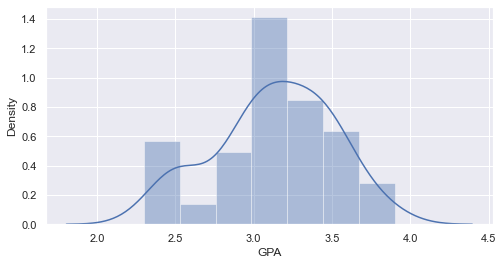

In [55]:
sns.distplot(survey_df["GPA"])


C:\Users\Mishika Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

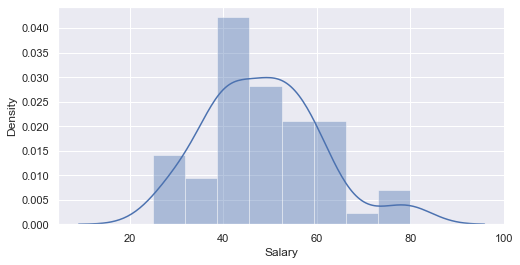

In [57]:
sns.distplot(survey_df["Salary"])

C:\Users\Mishika Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending', ylabel='Density'>

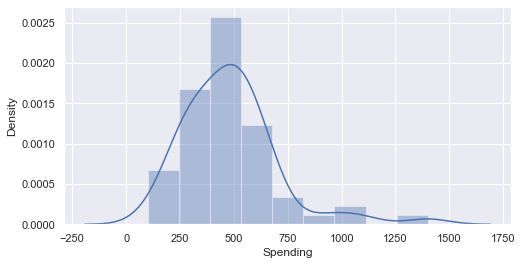

In [58]:
sns.distplot(survey_df["Spending"])

C:\Users\Mishika Raj\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

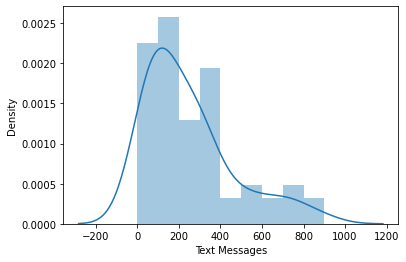

In [28]:
sns.distplot(survey_df["Text Messages"])

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'GPA'}>],
       [<AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Social Networking'}>,
        <AxesSubplot:title={'center':'Satisfaction'}>],
       [<AxesSubplot:title={'center':'Spending'}>,
        <AxesSubplot:title={'center':'Text Messages'}>, <AxesSubplot:>]],
      dtype=object)

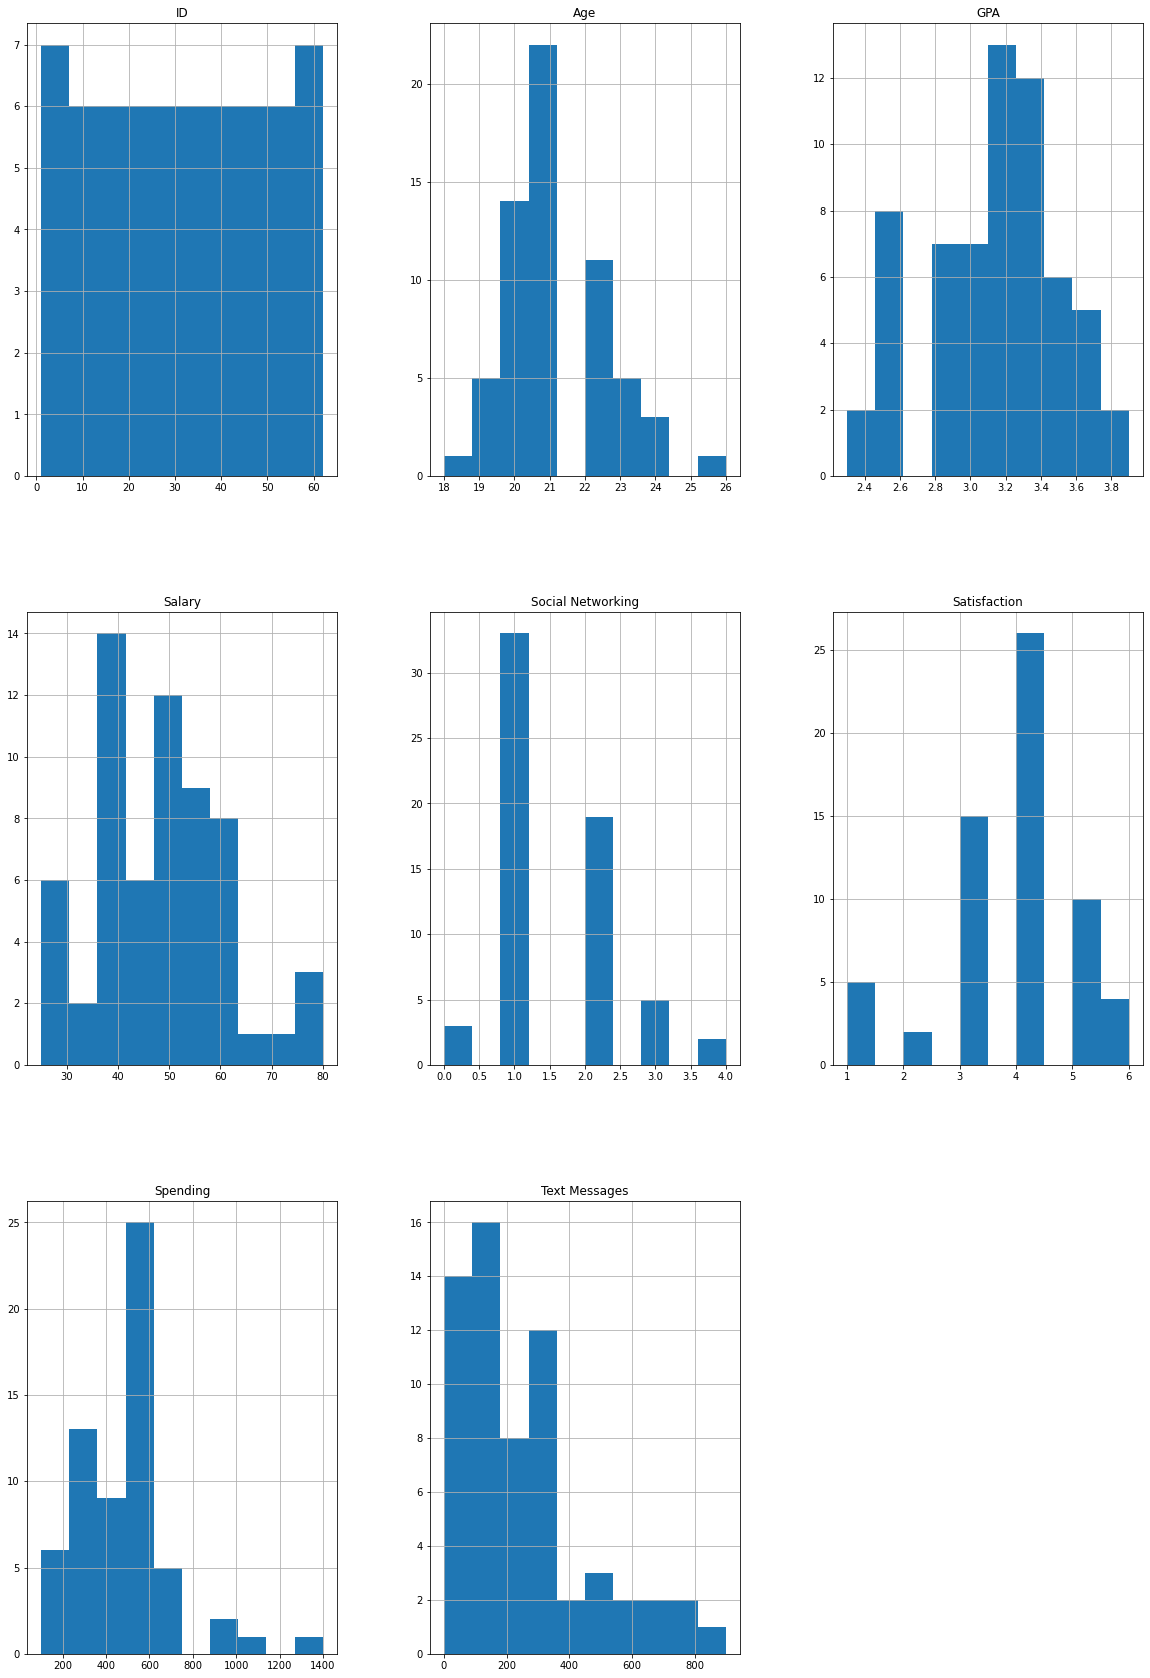

In [33]:
survey_df.hist(figsize=(20,30))
